**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [980]:
# Write your code here
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar, fsolve

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [981]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [982]:
# Answers 
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize_scalar

# Parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0
par.kappa = 0.1  # Social cost of carbon

# Utility function
def utility(c1, c2, l, alpha, nu, epsilon):
    return np.log(c1**alpha * c2**(1 - alpha)) - nu * l**(1 + epsilon) / (1 + epsilon)

# Budget constraint function
def budget_constraint(l, w, p1, p2, tau, T, pi1, pi2, alpha):
    income = w * l + T + pi1 + pi2
    c1 = alpha * income / p1
    c2 = (1 - alpha) * income / (p2 + tau)
    return c1, c2

# Labor supply function
def labor_supply(w, p1, p2, tau, T, A, gamma, alpha, nu, epsilon):
    pi1 = (p1 * A**gamma / w)**(1 / (1 - gamma))
    pi2 = (p2 * A**gamma / w)**(1 / (1 - gamma))
    
    def objective(l):
        c1, c2 = budget_constraint(l, w, p1, p2, tau, T, pi1, pi2, alpha)
        return -utility(c1, c2, l, alpha, nu, epsilon)
    
    result = minimize_scalar(objective, bounds=(1e-5, 100), method='bounded')
    return result.x

# Market clearing conditions function
def market_clearing_conditions(p1, p2, par):
    w = 1  # Explicitly setting w = 1 as the numeraire
    l_star = labor_supply(w, p1, p2, par.tau, par.T, par.A, par.gamma, par.alpha, par.nu, par.epsilon)
    y1_star = par.A * l_star**par.gamma
    y2_star = par.A * l_star**par.gamma
    return l_star, y1_star, y2_star

# Check market clearing conditions with w = 1 (numeraire)
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
results = []

for p1 in p1_values:
    for p2 in p2_values:
        l_star, y1_star, y2_star = market_clearing_conditions(p1, p2, par)  # w = 1 is set inside the function
        results.append((p1, p2, l_star, y1_star, y2_star))

# Print a summary of the results
print("Summary of market clearing conditions for selected p1 and p2 values:")
for i, (p1, p2, l_star, y1_star, y2_star) in enumerate(results):
    if i % 10 == 0:  # Print every 10th result to reduce output
        print(f"p1: {p1:.2f}, p2: {p2:.2f}, l*: {l_star:.4f}, y1*: {y1_star:.4f}, y2*: {y2_star:.4f}")

Summary of market clearing conditions for selected p1 and p2 values:
p1: 0.10, p2: 0.10, l*: 0.9934, y1*: 0.9967, y2*: 0.9967
p1: 0.31, p2: 0.10, l*: 0.9656, y1*: 0.9827, y2*: 0.9827
p1: 0.52, p2: 0.10, l*: 0.9141, y1*: 0.9561, y2*: 0.9561
p1: 0.73, p2: 0.10, l*: 0.8468, y1*: 0.9202, y2*: 0.9202
p1: 0.94, p2: 0.10, l*: 0.7727, y1*: 0.8791, y2*: 0.8791
p1: 1.16, p2: 0.10, l*: 0.6993, y1*: 0.8363, y2*: 0.8363
p1: 1.37, p2: 0.10, l*: 0.6313, y1*: 0.7945, y2*: 0.7945
p1: 1.58, p2: 0.10, l*: 0.5707, y1*: 0.7555, y2*: 0.7555
p1: 1.79, p2: 0.10, l*: 0.5179, y1*: 0.7197, y2*: 0.7197
p1: 2.00, p2: 0.10, l*: 0.4723, y1*: 0.6873, y2*: 0.6873


**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [983]:
# write your answer here
from scipy.optimize import fsolve

# Function to find equilibrium prices
def equilibrium_prices():
    def equations(p):
        p1, p2 = p
        l_star, y1_star, y2_star = market_clearing_conditions(p1, p2, par)  # w = 1 as numeraire
        c1, c2 = budget_constraint(l_star, 1, p1, p2, par.tau, par.T, y1_star, y2_star, par.alpha)
        # Market clearing conditions
        # Check only two markets as per Walras' law
        condition1 = y1_star - c1
        condition2 = y2_star - c2
        return [condition1, condition2]
    
    p1_p2_initial_guess = [1, 1]
    p1_p2_equilibrium = fsolve(equations, p1_p2_initial_guess)
    return p1_p2_equilibrium

# Find equilibrium prices
p1_eq, p2_eq = equilibrium_prices()
print(f"\nEquilibrium prices: p1: {p1_eq}, p2: {p2_eq}")


Equilibrium prices: p1: 0.8044596129475206, p2: 1.8770724302103687


Testing with multiple initial guesses to see if the equilibrium prices change:

In [984]:
# Function to find equilibrium prices with different initial guesses
def equilibrium_prices2(initial_guess):
    def equations(p):
        p1, p2 = p
        l_star, y1_star, y2_star = market_clearing_conditions(p1, p2, par)  # w = 1 as numeraire
        c1, c2 = budget_constraint(l_star, 1, p1, p2, par.tau, par.T, y1_star, y2_star, par.alpha)
        # Market clearing conditions
        condition1 = y1_star - c1
        condition2 = y2_star - c2
        return [condition1, condition2]
    
    p1_p2_equilibrium = fsolve(equations, initial_guess)
    return p1_p2_equilibrium

# Test different initial guesses
initial_guesses = [
    [1, 1],
    [0.5, 0.5],
    [1.5, 1.5],
    [0.1, 0.1]
]

for guess in initial_guesses:
    p1_eq, p2_eq = equilibrium_prices2(guess)
    print(f"Initial guess: {guess} -> Equilibrium prices: p1: {p1_eq}, p2: {p2_eq}")

Initial guess: [1, 1] -> Equilibrium prices: p1: 0.8044596129475206, p2: 1.8770724302103687
Initial guess: [0.5, 0.5] -> Equilibrium prices: p1: 0.8044596129512056, p2: 1.8770724302092578
Initial guess: [1.5, 1.5] -> Equilibrium prices: p1: 0.8044596129470134, p2: 1.8770724302095292
Initial guess: [0.1, 0.1] -> Equilibrium prices: p1: 0.8044596129390637, p2: 1.8770724302121524


The equilibrium prices are P1=0.8 and P2=1.88

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [985]:
# Social welfare function
def social_welfare_function(params):
    tau, T = params
    par.tau = tau
    par.T = T
    p1_eq, p2_eq = equilibrium_prices()  # Find equilibrium prices with the current tau and T
    l_star, y1_star, y2_star = market_clearing_conditions(p1_eq, p2_eq, par)
    c1, c2 = budget_constraint(l_star, 1, p1_eq, p2_eq, tau, T, y1_star, y2_star, par.alpha)
    U = utility(c1, c2, l_star, par.alpha, par.nu, par.epsilon)
    SWF = U - par.kappa * y2_star  # Social welfare function
    return -SWF  # We minimize the negative social welfare to maximize it

# Optimize for tau and T
result = minimize(social_welfare_function, [0, 0], bounds=[(0, 2), (0, 2)])
optimal_tau, optimal_T = result.x
print(f"Optimal tau: {optimal_tau}, Optimal T: {optimal_T}")


Optimal tau: 1.9905731000571816, Optimal T: 0.10103959306334999


For the goverment to maximize SWF they should choose $\tau$=1.99 and T=0.1

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [986]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [987]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [988]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [989]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [990]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

Point y: [0.20901926 0.37774759]
Point A: [0.26071605 0.43635845]
Point B: [0.21315735 0.274245  ]
Point C: [0.10056103 0.27951775]
Point D: [0.20634391 0.44272557]


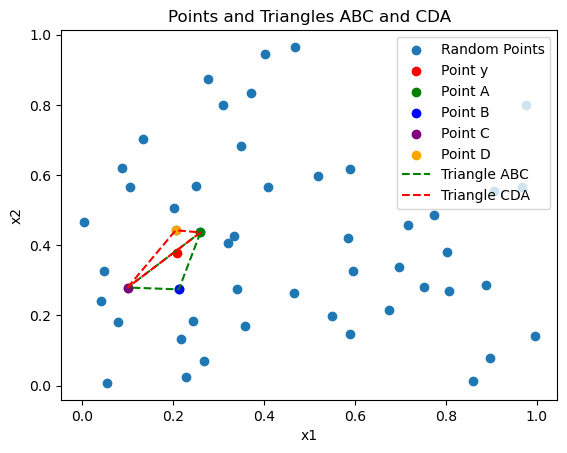

In [991]:
# write your answer here
from matplotlib import pyplot as plt


def euclidean_distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)


# Find points A, B, C, D based on the criteria provided
A_candidates = [p for p in X if p[0] > y[0] and p[1] > y[1]]
B_candidates = [p for p in X if p[0] > y[0] and p[1] < y[1]]
C_candidates = [p for p in X if p[0] < y[0] and p[1] < y[1]]
D_candidates = [p for p in X if p[0] < y[0] and p[1] > y[1]]

A = min(A_candidates, key=lambda p: euclidean_distance(p, y))
B = min(B_candidates, key=lambda p: euclidean_distance(p, y))
C = min(C_candidates, key=lambda p: euclidean_distance(p, y))
D = min(D_candidates, key=lambda p: euclidean_distance(p, y))

# Print the points
print(f"Point y: {y}")
print(f"Point A: {A}")
print(f"Point B: {B}")
print(f"Point C: {C}")
print(f"Point D: {D}")

# Plot points and triangles
plt.scatter(X[:, 0], X[:, 1], label='Random Points')
plt.scatter(*y, color='red', label='Point y')
plt.scatter(*A, color='green', label='Point A')
plt.scatter(*B, color='blue', label='Point B')
plt.scatter(*C, color='purple', label='Point C')
plt.scatter(*D, color='orange', label='Point D')

# Plot triangles ABC and CDA
triangle_ABC = np.array([A, B, C, A])
triangle_CDA = np.array([C, D, A, C])

plt.plot(triangle_ABC[:, 0], triangle_ABC[:, 1], 'g--', label='Triangle ABC')
plt.plot(triangle_CDA[:, 0], triangle_CDA[:, 1], 'r--', label='Triangle CDA')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Points and Triangles ABC and CDA')
plt.show()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [992]:
# write your answer here

# Function to compute barycentric coordinates
def barycentric_coordinates(A, B, C, P):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Function to check if point is inside the triangle
def is_inside_triangle(r1, r2, r3):
    return 0 <= r1 <= 1 and 0 <= r2 <= 1 and 0 <= r3 <= 1

# Compute barycentric coordinates for triangle ABC
r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(A, B, C, y)
inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)

# Compute barycentric coordinates for triangle CDA
r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(C, D, A, y)
inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)

# Print the results
print(f"Point y: {y}")
print(f"Point A: {A}")
print(f"Point B: {B}")
print(f"Point C: {C}")
print(f"Point D: {D}")

print(f"\nBarycentric coordinates with respect to ABC: r1 = {r1_ABC}, r2 = {r2_ABC}, r3 = {r3_ABC}")
print(f"Is y inside ABC? {inside_ABC}")

print(f"\nBarycentric coordinates with respect to CDA: r1 = {r1_CDA}, r2 = {r2_CDA}, r3 = {r3_CDA}")
print(f"Is y inside CDA? {inside_CDA}")

# Determine which triangle y is inside
if inside_ABC:
    print("Point y is inside triangle ABC.")
elif inside_CDA:
    print("Point y is inside triangle CDA.")
else:
    print("Point y is not inside any triangle.")


Point y: [0.20901926 0.37774759]
Point A: [0.26071605 0.43635845]
Point B: [0.21315735 0.274245  ]
Point C: [0.10056103 0.27951775]
Point D: [0.20634391 0.44272557]

Barycentric coordinates with respect to ABC: r1 = 0.6286263152916166, r2 = 0.06910145494351515, r3 = 0.3022722297648682
Is y inside ABC? True

Barycentric coordinates with respect to CDA: r1 = 0.3682598757102867, r2 = -0.13392661883334067, r3 = 0.765666743123054
Is y inside CDA? False
Point y is inside triangle ABC.


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [993]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [994]:
# write your answer here

# Compute barycentric coordinates for triangle ABC
r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(A, B, C, y)
inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)

# Compute barycentric coordinates for triangle CDA
r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(C, D, A, y)
inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)

# Compute the interpolated value
if inside_ABC:
    f_y = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
    triangle = "ABC"
elif inside_CDA:
    f_y = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
    triangle = "CDA"
else:
    f_y = np.nan
    triangle = "None"

# Compute the true value
true_value = f(y)

# Print the results
print(f"\nTriangle containing y: {triangle}")
print(f"Interpolated value at y: {f_y}")
print(f"True value at y: {true_value}")
print(f"Difference between true value and interpolated value: {abs(true_value - f_y)}")



Triangle containing y: ABC
Interpolated value at y: 0.08405201731052576
True value at y: 0.0789565216259594
Difference between true value and interpolated value: 0.005095495684566367


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [995]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

Point y: [0.2 0.2]
Triangle containing y: None
Interpolated value at y: nan
True value at y: 0.04000000000000001
Difference between true value and interpolated value: nan

Point y: [0.8 0.2]
Triangle containing y: None
Interpolated value at y: nan
True value at y: 0.16000000000000003
Difference between true value and interpolated value: nan

Point y: [0.8 0.8]
Triangle containing y: None
Interpolated value at y: nan
True value at y: 0.6400000000000001
Difference between true value and interpolated value: nan

Point y: [0.8 0.2]
Triangle containing y: None
Interpolated value at y: nan
True value at y: 0.16000000000000003
Difference between true value and interpolated value: nan

Point y: [0.5 0.5]
Triangle containing y: None
Interpolated value at y: nan
True value at y: 0.25
Difference between true value and interpolated value: nan



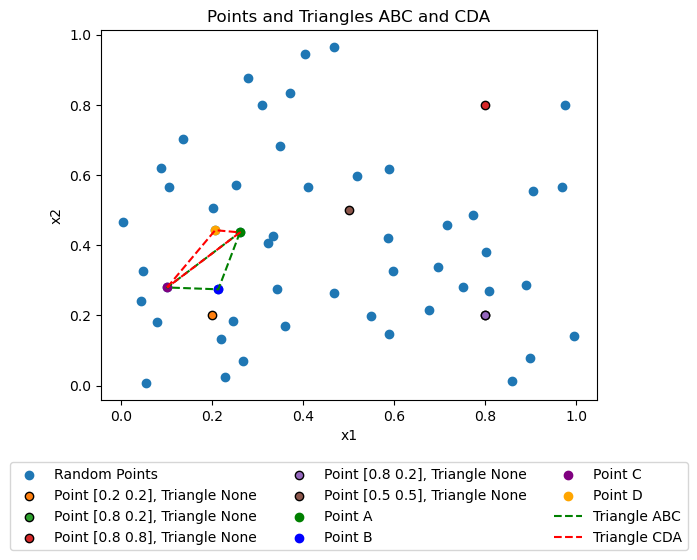

In [996]:
# write your answer here

# Function to process each point in Y
from matplotlib import pyplot as plt


def process_point(y):
    y = np.array(y)
    # Compute barycentric coordinates for triangle ABC
    r1_ABC, r2_ABC, r3_ABC = barycentric_coordinates(A, B, C, y)
    inside_ABC = is_inside_triangle(r1_ABC, r2_ABC, r3_ABC)

    # Compute barycentric coordinates for triangle CDA
    r1_CDA, r2_CDA, r3_CDA = barycentric_coordinates(C, D, A, y)
    inside_CDA = is_inside_triangle(r1_CDA, r2_CDA, r3_CDA)

    # Compute the interpolated value
    if inside_ABC:
        f_y = r1_ABC * f(A) + r2_ABC * f(B) + r3_ABC * f(C)
        triangle = "ABC"
    elif inside_CDA:
        f_y = r1_CDA * f(C) + r2_CDA * f(D) + r3_CDA * f(A)
        triangle = "CDA"
    else:
        f_y = np.nan
        triangle = "None"

    # Compute the true value
    true_value = f(y)

    # Print the results
    print(f"Point y: {y}")
    print(f"Triangle containing y: {triangle}")
    print(f"Interpolated value at y: {f_y}")
    print(f"True value at y: {true_value}")
    print(f"Difference between true value and interpolated value: {abs(true_value - f_y)}\n")

    return y, f_y, true_value, triangle

# Process all points in Y
results = [process_point(y) for y in Y]

# Plot points and triangles
plt.scatter(X[:, 0], X[:, 1], label='Random Points')
for result in results:
    y, f_y, true_value, triangle = result
    plt.scatter(*y, label=f'Point {y}, Triangle {triangle}', edgecolor='black')

plt.scatter(*A, color='green', label='Point A')
plt.scatter(*B, color='blue', label='Point B')
plt.scatter(*C, color='purple', label='Point C')
plt.scatter(*D, color='orange', label='Point D')

# Plot triangles ABC and CDA
triangle_ABC = np.array([A, B, C, A])
triangle_CDA = np.array([C, D, A, C])

plt.plot(triangle_ABC[:, 0], triangle_ABC[:, 1], 'g--', label='Triangle ABC')
plt.plot(triangle_CDA[:, 0], triangle_CDA[:, 1], 'r--', label='Triangle CDA')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title('Points and Triangles ABC and CDA')
plt.show()
